Approximate pi using only functions from a four function calculator.

In [2]:
using ExprOptimization
using TikzPictures
TikzPictures.standaloneWorkaround(true)

In [3]:
grammar = @grammar begin
    R = |(1:9)
    R = R + R
    R = R - R
    R = R * R
    R = R / R
end

ExprRules.Grammar(Any[1, 2, 3, 4, 5, 6, 7, 8, 9, :(R + R), :(R - R), :(R * R), :(R / R)], Symbol[:R, :R, :R, :R, :R, :R, :R, :R, :R, :R, :R, :R, :R], Bool[true, true, true, true, true, true, true, true, true, false, false, false, false], Bool[false, false, false, false, false, false, false, false, false, false, false, false, false], Dict(:R=>[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]), Array{Symbol,1}[Symbol[], Symbol[], Symbol[], Symbol[], Symbol[], Symbol[], Symbol[], Symbol[], Symbol[], Symbol[:R, :R], Symbol[:R, :R], Symbol[:R, :R], Symbol[:R, :R]])

In [4]:
function ExprOptimization.loss(tree::RuleNode)
    value = eval(tree, grammar)
    if isinf(value) || isnan(value)
        return Inf
    end
    Δ = abs(value - π)
    return log(Δ) + length(tree) / 1e4
end

Monte Carlo optimization

In [5]:
srand(0)
p = MonteCarloParams(300000, 10)
results1 = optimize(p, grammar, :R)
(results1.expr, eval(results1.expr))

(:(3 + 1 / 7), 3.142857142857143)

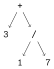

In [7]:
display(results1.tree, grammar)

Genetic Programming optimization

In [8]:
srand(0)
p = GeneticProgramParams(10000,30,10,0.2,0.4,0.4; select_method=GeneticProgram.TruncationSelection(100))
results2 = optimize(p, grammar, :R)
(results2.expr, eval(results2.expr))

(:((((8 / ((8 / 7) / 5 + 3)) / 7) * 2) / 5 + 3), 3.1415929203539825)

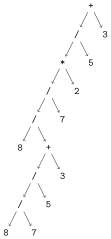

In [9]:
display(results2.tree, grammar)

In [10]:
srand(1)
p = CrossEntropyParams(10000,30,10,5000)
results3 = optimize(p, grammar, :R)
(results3.expr, eval(results3.expr))

(:(3 + 9 / (8 * 8)), 3.140625)

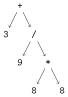

In [11]:
display(results3.tree, grammar)